<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# Import yfinance
import yfinance as yf


In [ ]:
# Binance prediction

In [ ]:
# Bringing data from yfinance to dataframe - Binance
df = yf.download('BNB-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Bringing data into csv file
df.to_csv('binance_data.csv', encoding='utf-8', index=True)

In [ ]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09 00:00:00+00:00,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10 00:00:00+00:00,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11 00:00:00+00:00,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12 00:00:00+00:00,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13 00:00:00+00:00,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

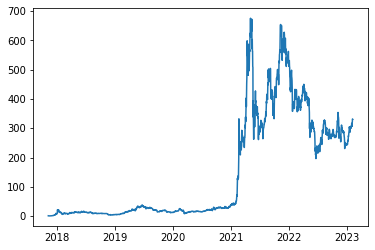

In [ ]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# length of dataframe
len(df)

1914

In [ ]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [ ]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[1.9907699823379517,
 1.796839952468872,
 1.6704699993133545,
 1.5196900367736816,
 1.6866199970245361,
 1.592579960823059,
 1.5304499864578247,
 1.5779199600219727,
 1.5103600025177002,
 1.6743299961090088,
 1.6137700080871582,
 1.6244499683380127,
 1.5740599632263184,
 1.6117500066757202,
 1.548699975013733,
 1.717710018157959,
 1.8738700151443481,
 1.8531299829483032,
 1.9429800510406494,
 1.9171099662780762,
 1.7515300512313843,
 1.9969700574874878,
 2.070230007171631,
 2.084160089492798,
 2.227250099182129,
 2.4916799068450928,
 2.5952999591827393,
 2.5876901149749756,
 2.779949903488159,
 2.830670118331909,
 2.6104300022125244,
 2.483370065689087,
 2.7066500186920166,
 2.6847500801086426,
 2.77810001373291,
 3.1587400436401367,
 3.996150016784668,
 4.664649963378906,
 5.756720066070557,
 5.61584997177124,
 5.792329788208008,
 5.176209926605225,
 5.180009841918945,
 4.336150169372559,
 4.839260101318359,
 5.285679817199707,
 6.560009956359863,
 9.029419898986816,
 10.1070003509521

In [ ]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[472.00506591796875,
 462.82208251953125,
 440.00543212890625,
 383.07391357421875,
 358.0961608886719,
 383.9339599609375,
 371.36895751953125,
 384.6193542480469,
 375.7554626464844,
 390.0882873535156,
 386.0843811035156,
 389.1327819824219,
 377.6129150390625,
 375.2773132324219,
 385.46380615234375,
 367.4716796875,
 370.87774658203125,
 399.02960205078125,
 414.20001220703125,
 419.5455627441406,
 433.2292785644531,
 408.7767639160156,
 422.4655456542969,
 415.1192321777344,
 400.4223937988281,
 403.3897399902344,
 398.88677978515625,
 403.6607971191406,
 432.4093933105469,
 427.9181213378906,
 402.4500427246094,
 399.5691833496094,
 400.0435791015625,
 380.825927734375,
 356.6612548828125,
 374.3074645996094,
 366.53948974609375,
 361.2346496582031,
 374.9149475097656,
 373.6387634277344,
 360.5310363769531,
 395.6124267578125,
 408.4822998046875,
 409.00030517578125,
 402.5506896972656,
 374.2808837890625,
 384.87335205078125,
 375.0111999511719,
 381.3446350097656,
 381.958557

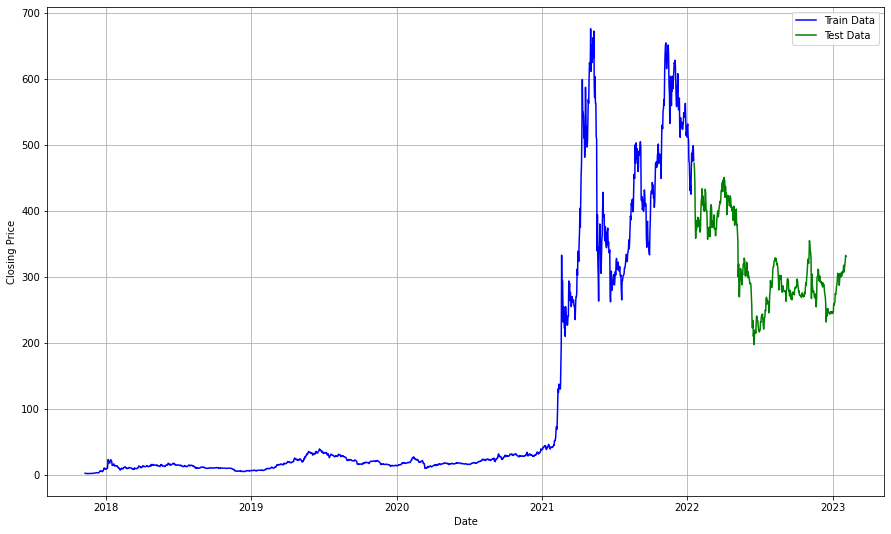

In [ ]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [ ]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [ ]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [ ]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1912
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7503.319
Method:                       css-mle   S.D. of innovations             12.248
Date:                Sat, 04 Feb 2023   AIC                          15018.638
Time:                        16:25:11   BIC                          15051.973
Sample:                             1   HQIC                         15030.906
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.290      0.599      0.549      -0.394       0.742
ar.L1.D.y     -0.1346      0.023     -5.888      0.000      -0.179      -0.090
ar.L2.D.y      0.0792      0.023      3.442      0.0

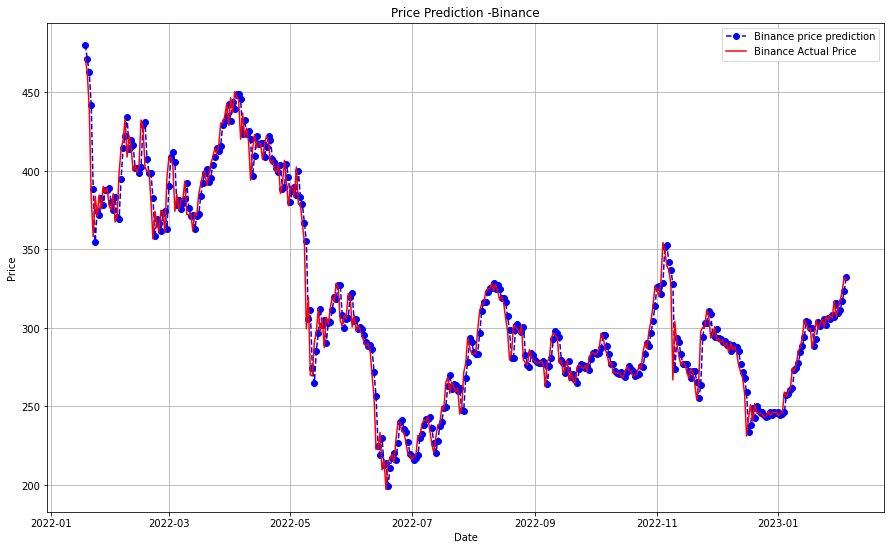

In [ ]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Binance price prediction')
plt.plot(start_date, test, color ='red', label ='Binance Actual Price')
plt.title('Price Prediction -Binance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.02563720775236462


MAPE of 2.6% implies the model is 97.4% accurate in predicting the test obeservations

In [ ]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 314.56257346529253
Mean Squared Error: 11.712084548251642


In [ ]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 332.3303639003099
Prediction 453.7746934108852
Prediction 476.2831196908452
Prediction 451.7724679090949
Prediction 391.90710150794627


In [ ]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [ ]:
#Reviewing dataframe
Prediction

,0
0,332.330364
1,453.774693
2,476.283120
3,451.772468
4,391.907102


In [ ]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Binance_prediction.csv', header='Prediction', index=True)